# <center> Disney Studio Income Analysis

## Import Libraries

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import date
from datetime import datetime
import plotly.express as px
import re

In [ ]:
Movies Income Decreased or Increased#reading data set
df=pd.read_csv("/content/disney_movies.csv")

## Task 1: Data Exploration

In [ ]:
#printing dataset
df


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [ ]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [ ]:
df.tail()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936


In [ ]:
df.sample(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
566,Zootopia,2016-03-04,Adventure,PG,341268248,341268248
443,Invincible,2006-08-25,Drama,PG,57806952,74398864
321,Fantasia 2000 (IMAX),2000-01-01,Musical,G,60507228,94852354
88,Ernest Goes to Jail,1990-04-06,Comedy,PG,25029569,49999822
456,The Invisible,2007-04-27,Thriller/Suspense,PG-13,20568319,25202168
389,Under the Tuscan Sun,2003-09-26,Comedy,PG-13,43601508,60944053
197,Miami Rhapsody,1995-01-27,Romantic Comedy,PG-13,5086578,9857435
160,Cool Runnings,1993-10-01,Comedy,PG,68856263,140392731
162,The Three Musketeers,1993-11-12,Adventure,PG,53661805,109310377
183,Color of Night,1994-08-19,Thriller/Suspense,R,19750470,40804816


In [ ]:
#size of dataset
df.shape

(579, 6)

In [ ]:
#Getting type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [ ]:
# Describe the data
describe = df.describe()
print(describe)

        total_gross  inflation_adjusted_gross
count  5.790000e+02              5.790000e+02
mean   6.470179e+07              1.187625e+08
std    9.301301e+07              2.860853e+08
min    0.000000e+00              0.000000e+00
25%    1.278886e+07              2.274123e+07
50%    3.070245e+07              5.515978e+07
75%    7.570903e+07              1.192020e+08
max    9.366622e+08              5.228953e+09


In [ ]:
print(df.to_string)

<bound method DataFrame.to_string of                          movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
0    

Checking Null Values , release_date into datatime , best & worst total gross

In [ ]:
#checking null values
df.isnull()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
574,False,False,False,False,False,False
575,False,False,False,False,False,False
576,False,False,False,False,False,False
577,False,False,False,False,False,False


In [ ]:
#filling null values
df['genre'].fillna("Entertainment", inplace = True)

In [ ]:
#filling null values
df['mpaa_rating'].fillna("Not Rated", inplace = True)

In [ ]:
#release_date into datatime
df['release_date'] = pd.to_datetime(df['release_date'])

In [31]:
# best & worst total gross
# top movies with best total_gross
df.sort_values('total_gross',ascending=False).head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade,year
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2010-2020,2015


In [33]:
#  movie with least total_gross
df.sort_values('total_gross',ascending=True).head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade,year
27,Amy,1981-03-20,Drama,Not Rated,0,0,1980-1990,1981


In [34]:
# movies with best inflation_adjusted_gross
df.sort_values('inflation_adjusted_gross',ascending=False).head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<1950,1937


In [35]:
# movies with least inflation_adjusted_gross
df.sort_values('inflation_adjusted_gross',ascending=True).head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade,year
27,Amy,1981-03-20,Drama,Not Rated,0,0,1980-1990,1981


## Task 2: Visualize Year Distribution Plot

In [ ]:
#spliting date into year
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

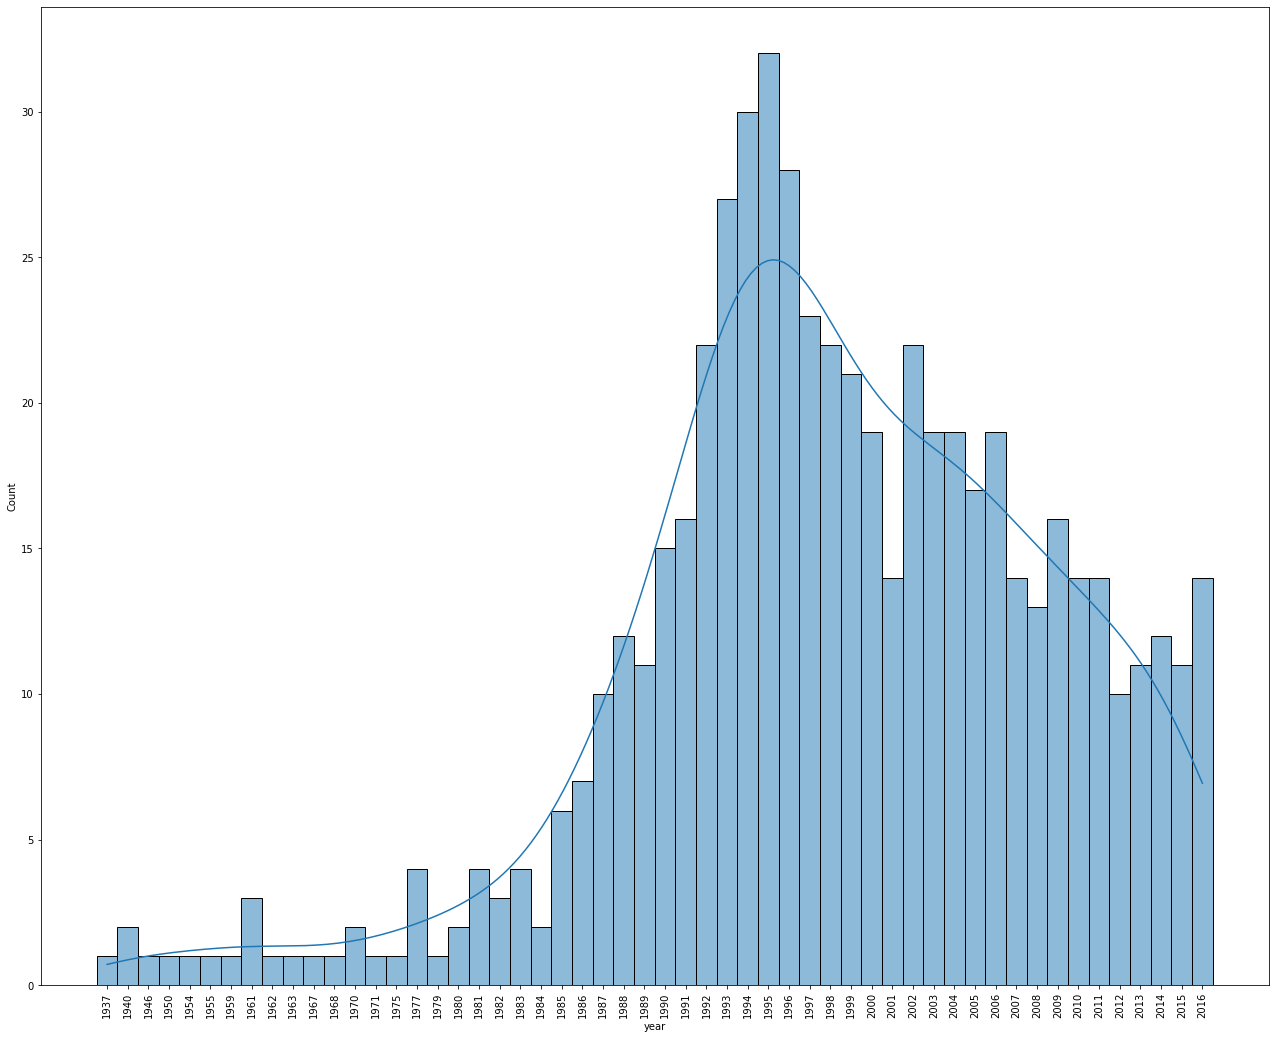

In [ ]:
#ploting distribution plot
plt.figure(figsize=(22,18))
plt.xticks(rotation=90)
sns.histplot(df['year'],kde=True)

## Task 3: Does Movies Income Decreased or Increased?

In [48]:
#Does Movies Income Decreased or Increased?
income=[]
for i in range(579):
  if df['total_gross'][i] < df['inflation_adjusted_gross'][i]:
    income.append('Increased')
  elif df['total_gross'][i] >= df['inflation_adjusted_gross'][i]:
    income.append('Decreased')
df['income']=income
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade,year,income
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<1950,1937,Increased
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,<1950,1940,Increased
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,<1950,1940,Increased
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,<1950,1946,Increased
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,<1950,1950,Increased
...,...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2010-2020,2016,Decreased
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2010-2020,2016,Decreased
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2010-2020,2016,Decreased
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2010-2020,2016,Decreased


Text(0.5, 0, 'Income Status')

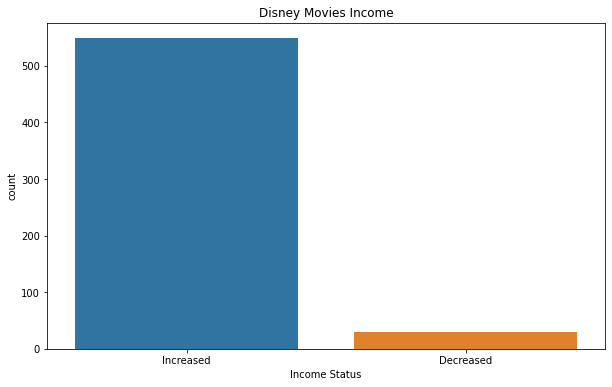

In [49]:
# Movies Income Decreased or Increased
plt.figure(figsize=(10, 6))
plt.title('Disney Movies Income')
sns.countplot(x='income', data=df)
plt.xlabel('Income Status')

Increased    549
Decreased     30
Name: income, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


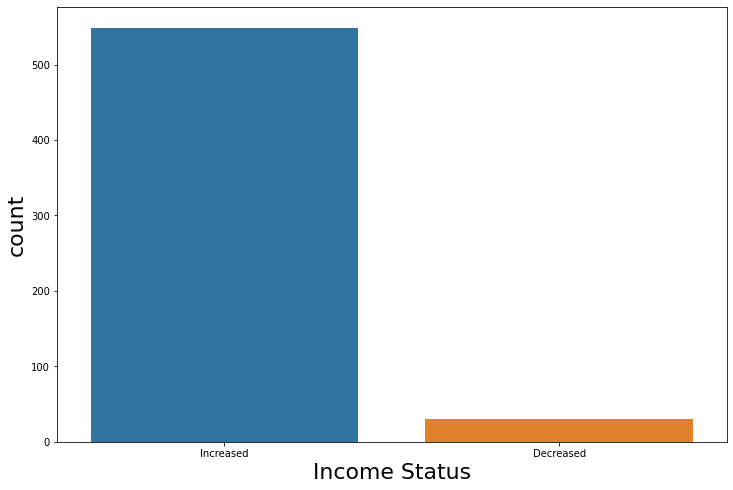

In [51]:
#Total Count of Income Status
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
y = df["income"]
sns.countplot(y)
target_temp =df.income.value_counts()
plt.xlabel("Income Status",fontsize=22)
plt.ylabel("count", fontsize=22)
print(target_temp)

In [ ]:
#creating decade of 10 years of interval
lis=[]
for i in range(579):
    if df['release_date'][i].year > 2010:
        lis.append('2010-2020')
    elif df['release_date'][i].year <= 2010 and df['release_date'][i].year > 2000:
        lis.append('2000-2010')
    elif df['release_date'][i].year <= 2000 and df['release_date'][i].year > 1990:
        lis.append('1990-2000')
    elif df['release_date'][i].year <= 1990 and df['release_date'][i].year > 1980:
        lis.append('1980-1990')
    elif df['release_date'][i].year <= 1980 and df['release_date'][i].year > 1970:
        lis.append('1970-1980')
    elif df['release_date'][i].year <= 1970 and df['release_date'][i].year > 1960:
        lis.append('1960-1970')
    elif df['release_date'][i].year <= 1960 and df['release_date'][i].year > 1950:
        lis.append('1950-1960')
    else:
        lis.append('<1950')
df['decade'] = lis
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<1950
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,<1950
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,<1950
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,<1950
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,<1950
...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2010-2020
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2010-2020
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2010-2020
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2010-2020


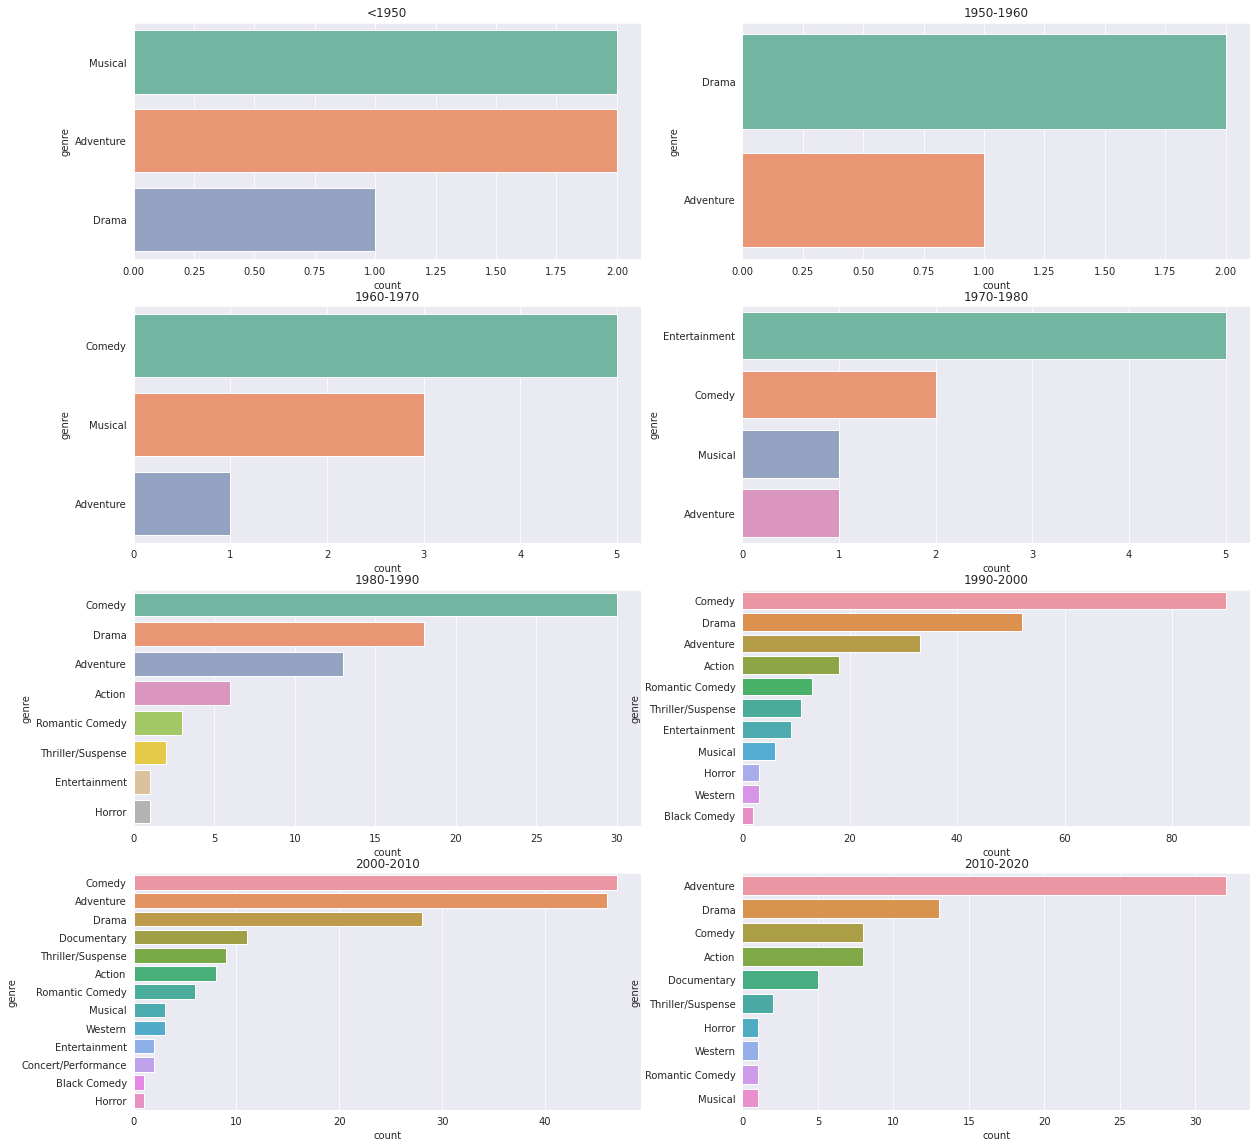

In [ ]:
#creating decade of 10 years of interval
decade_lis =  df['decade'].unique()
sns.set_style('darkgrid')
fig,axes = plt.subplots(4,2,figsize=(20,20))
axes = axes.flatten()
sns.set_palette('Set2')
for i in range(len(decade_lis)):
    ax = sns.countplot(y='genre',data=df[df['decade']==decade_lis[i]],ax=axes[i],order=df[df['decade']==decade_lis[i]]['genre'].value_counts().index)
    ax.set_title(decade_lis[i])
    fig.show()
plt.show()

## Task 4: Describe the total counts of Genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Entertainment           17
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64


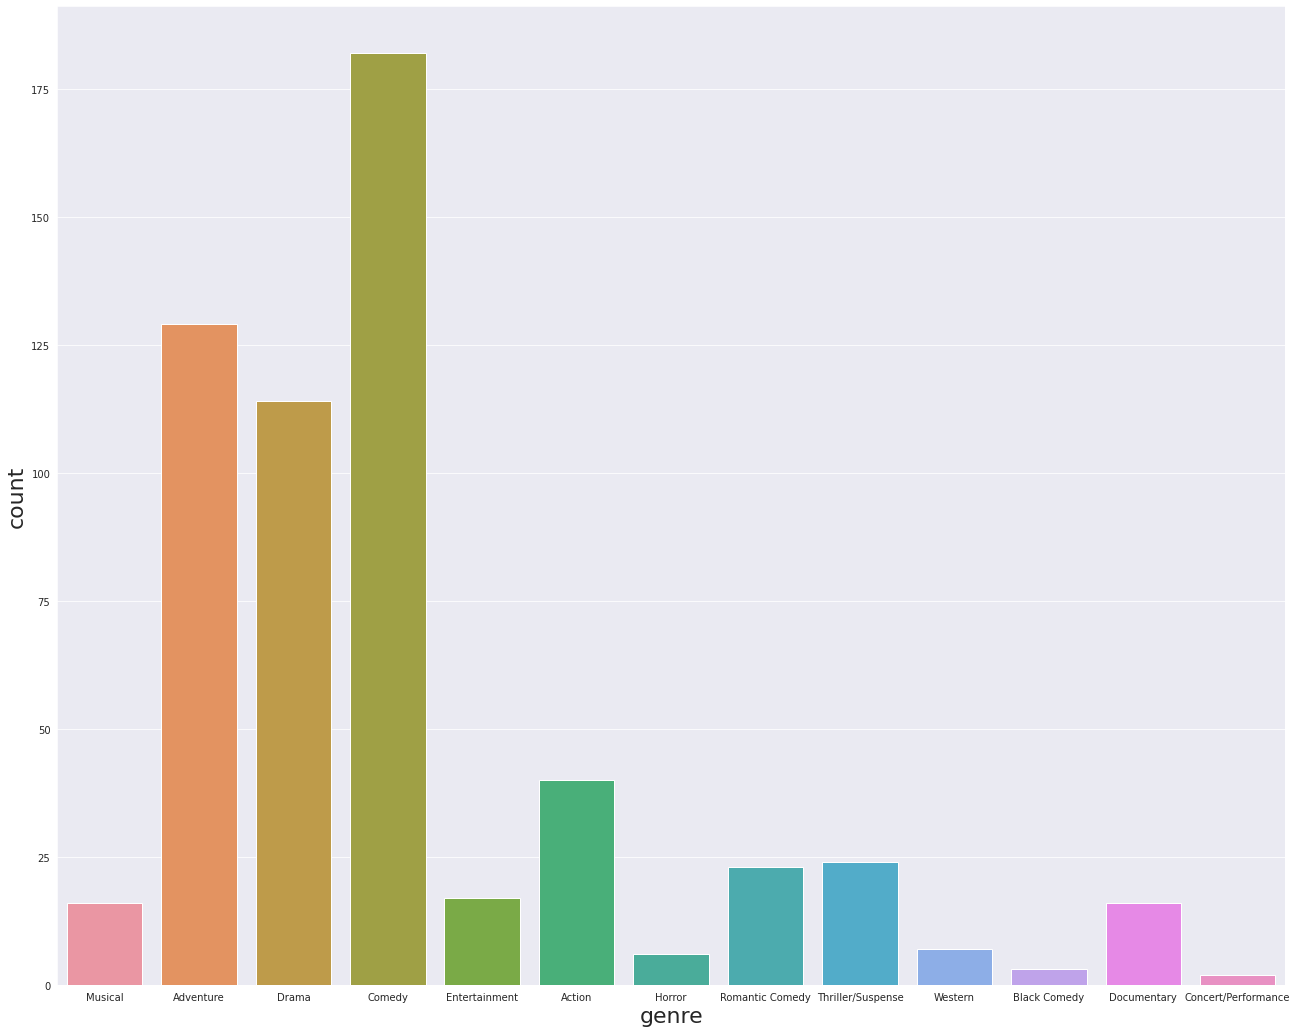

In [ ]:
#Total Count of Genres
fig_dims = (22,18)
fig, ax = plt.subplots(figsize=fig_dims)
y = df["genre"]
sns.countplot(y)
target_temp =df.genre.value_counts()
plt.xlabel("genre",fontsize=22)
plt.ylabel("count", fontsize=22)
print(target_temp)